# Demo 6: Confusion Metrix


In [1]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))
# Add the path to sys.path
sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# !pip install pyarrow

In [3]:
#  Create a variable named 'historical_prices' to store historical price data between the dates'2005-01-01' and '2015-01-01'. Use the function 'create_hist_prices()' from 'func_lib' to generate or retrieve the historical prices.
historical_prices = func_lib.create_hist_prices( data_file='hp.pkl')

Loading historical prices from hp.pkl


In [4]:
historical_prices.head()

Ticker,ABBV,ABNB,ACGL,ACN,ADI,ADM,ADSK,AES,AFL,AKAM,...,WBD,WEC,WSM,WST,WYNN,XEL,XYL,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,1.215037,NaN,27.973982,6.179295,8.052905,24.029154,6.777081,321.250,...,NaN,4.183430,6.985486,5.409514,NaN,6.735727,NaN,NaN,25.027779,NaN
2000-01-04,NaN,NaN,1.208433,NaN,26.558800,6.114925,7.660816,23.076260,6.597239,300.000,...,NaN,4.210863,6.765312,5.465397,NaN,6.890827,NaN,NaN,24.666668,NaN
2000-01-05,NaN,NaN,1.320692,NaN,26.946508,6.018376,7.178246,23.324844,6.559378,283.500,...,NaN,4.402890,6.805344,5.443047,NaN,7.156703,NaN,NaN,25.138889,NaN
2000-01-06,NaN,NaN,1.307485,NaN,26.209841,6.050557,6.740915,23.511276,6.691895,236.125,...,NaN,4.389174,5.444275,5.387166,NaN,7.090238,NaN,NaN,23.777779,NaN
2000-01-07,NaN,NaN,1.380124,NaN,26.946508,6.147111,7.540174,23.967005,6.824407,248.375,...,NaN,4.444040,5.354205,5.443047,NaN,7.090238,NaN,NaN,23.513889,NaN


In [5]:
# Create a list named 'list_of_momentums' and add 1 to the list
list_of_momentums = [1]
# Compute the total returns using the historical prices and the list of momentums. Use the 'compute_returns()' function from 'func_lib'. Pass 'historical_prices' and 'list_of_momentums' as arguments to 'func_lib.compute_returns()'.
# - Store the result in a variable named 'total_returns'.
total_returns     = func_lib.compute_returns(historical_prices, list_of_momentums)
total_returns.dropna(inplace=True)

In [6]:
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
ABBV   2013-01-03      -0.012633    -0.008258
       2013-01-04       0.002035    -0.012633
       2013-01-07      -0.021764     0.002035
       2013-01-08       0.005637    -0.021764
       2013-01-09       0.002950     0.005637

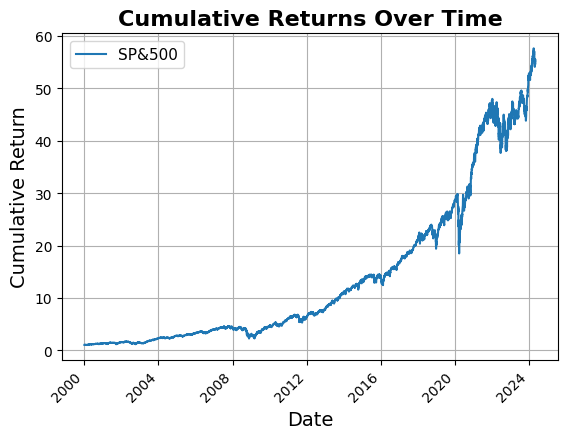

The CAGR is: 17.89%
Sharpe Ratio of Strategy: 0.89


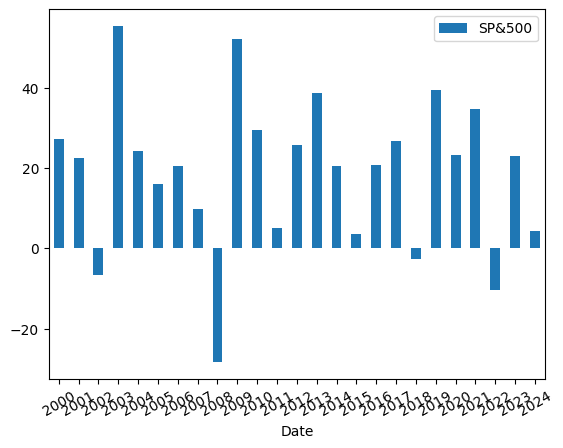

In [7]:
# Compute cumulative and calendar returns from the total returns data. 
# Use the 'compute_BM_Perf()' function from 'func_lib' to perform this calculation. 
# Pass 'total_returns' as an argument to 'func_lib.compute_BM_Perf()'.
# - The function returns two outputs: 'cum_returns' for cumulative returns and 'calendar_returns' for calendar returns.
# - Assign the outputs to the variables 'cum_returns' and 'calendar_returns' respectively.
cum_returns, calendar_returns  = func_lib.compute_BM_Perf(total_returns)

In [8]:
# Calculate the Relative Strength Index (RSI) for each 'Ticker' and add it to the 'total_returns' DataFrame.First, group the 'total_returns' DataFrame by the 'Ticker' column.
# For each group, select the '1_d_returns' column and apply a transformation using the 'calculate_rsi' function from 'func_lib'.
# - Assign the result to a new column named 'RSI' in the 'total_returns' DataFrame.
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(func_lib.calculate_rsi)

In [9]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI
Ticker Date                                       
ABBV   2013-01-03      -0.012633    -0.008258  NaN
       2013-01-04       0.002035    -0.012633  NaN
       2013-01-07      -0.021764     0.002035  NaN
       2013-01-08       0.005637    -0.021764  NaN
       2013-01-09       0.002950     0.005637  NaN

In [10]:
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0

model_name = 'RSI'

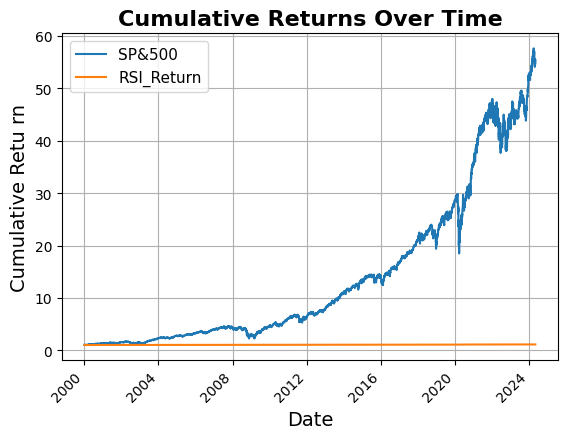

The CAGR is: 0.44%
Sharpe Ratio of Strategy: 0.45


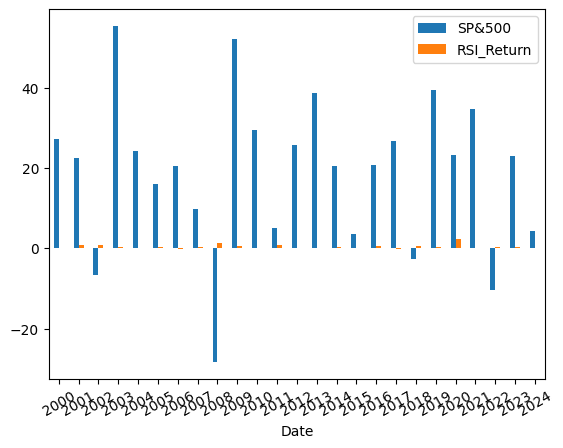

In [11]:
# Compute cumulative and calendar returns for the given trading strategy.
# Use the 'compute_strat_perf()' function from 'func_lib' to perform this calculation.
# Pass 'total_returns', 'cum_returns', 'calendar_returns', 'trading_strategy', and 'model_name' as arguments.
# - The function returns updated 'cum_returns' and 'calendar_returns' based on the strategy's performance.
cum_returns, calendar_returns  = func_lib.compute_strat_perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name)

In [15]:
# Create the true values (y_test) indicating whether future 1-day returns (F_1_d_returns) are larger or smaller than 0.
# Use the 'np.where()' function to evaluate the 'F_1_d_returns' column in the 'total_returns' DataFrame.
# Store the result in a new column called 'y_test' in the 'total_returns' DataFrame.
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
# Copy the values from the 'Position' column of 'total_returns' to a new column named 'y_pred'.
total_returns['y_pred'] = total_returns['Position']

In [16]:
# Convert the 'y_test' column from the 'total_returns' DataFrame to a list using the 'tolist()' method.
# Store the result in a variable named 'y_test'.
# Similarly, convert the 'y_pred' column to a list and store it in a variable named 'y_pred'.
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [18]:
# Create a DataFrame named 'metrics_df' using the 'pd.DataFrame()' function.
# Define a dictionary with two keys: 'Metric' and 'Value'.
#     - The 'Metric' key should have a list of strings: ['Accuracy', 'Precision', 'Recall'].
#     - The 'Value' key should have a list of the calculated metrics: [accuracy, precision, recall].
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

In [19]:
metrics_df

,Metric,Value
0,Accuracy,0.486189
1,Precision,0.523385
2,Recall,0.006041
